In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [39]:
# Load and preprocess the data
file_path = 'all_infants_5h_subset_vital_signs.csv'
data = pd.read_csv(file_path)

# Group data by each infant
grouped_data = data.groupby('infant_number')

# Resample heart rate data at 5-minute intervals (5 hours = 18000 seconds, resample at 300s interval)
heart_rate_sequences = {}
for infant_id, group in grouped_data:
    resampled_time_index = np.arange(0, 18000, 300)
    interpolated_heart_rate = np.interp(resampled_time_index, group['time_r_peak'], group['heart_rate'])
    heart_rate_sequences[infant_id] = interpolated_heart_rate

# Combine all interpolated heart rate sequences for each infant into a single dataset for GAN training
all_heart_rates = np.array(list(heart_rate_sequences.values()))


In [40]:
heart_rates_df = pd.DataFrame(all_heart_rates, columns=[f'Time_{i+1}' for i in range(all_heart_rates.shape[1])])
heart_rates_df

,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,Time_10,...,Time_51,Time_52,Time_53,Time_54,Time_55,Time_56,Time_57,Time_58,Time_59,Time_60
0,157.894737,141.509434,151.239669,153.125631,164.679366,148.514851,155.486023,161.742750,163.043478,154.639175,...,144.045858,150.653679,163.043478,144.060701,148.514851,145.631068,157.704294,167.166042,156.388504,140.721714
1,118.110236,118.110236,114.447323,113.207547,116.227067,127.164549,144.753344,139.038435,121.042190,146.566523,...,129.894574,133.002128,137.614679,132.458855,136.873087,131.182504,124.773081,97.357272,35.018605,130.778121
2,101.351351,111.862756,118.590146,119.470269,114.071752,117.340672,115.232631,116.731517,123.107600,131.727096,...,168.539326,130.287665,124.150502,132.346637,129.970785,128.755365,121.324083,121.602665,121.927544,126.034908
3,159.574468,166.274202,155.440415,164.835165,165.745856,166.487620,157.434784,160.427808,159.141274,159.893900,...,169.491525,173.410405,172.413793,175.438596,180.722892,170.312308,184.090900,177.514793,166.528545,152.182757
4,178.571429,178.571429,178.571429,178.571429,178.571429,178.571429,168.096479,144.230769,138.605816,146.694988,...,159.683991,164.835165,156.798246,150.397919,150.841751,158.812611,153.061225,156.250000,141.573611,145.671989
5,133.928571,142.517007,135.978334,137.614679,132.158590,126.263169,130.402867,131.578947,135.746606,132.582938,...,154.602386,145.827778,160.427808,140.617358,139.807827,147.585012,143.035450,152.359582,147.910014,148.514851
6,184.049080,151.866532,161.221137,170.522106,144.847138,141.935351,146.188988,154.052664,159.467429,155.440415,...,160.710675,164.559529,142.665911,163.401794,153.061225,163.894503,155.440415,155.440415,156.841061,152.462648
7,153.061225,153.846154,129.850529,135.135135,132.743363,120.792146,132.282243,133.183883,126.185070,128.134574,...,136.090016,144.927536,148.514851,152.284264,147.783251,140.685145,136.291045,137.968626,125.600240,127.527236
8,142.857143,140.764732,179.862368,144.746645,138.996543,139.288504,139.450754,140.186916,144.358678,139.256341,...,153.137315,172.413793,147.783251,160.733870,145.631068,136.986301,137.233062,138.994051,139.903950,137.742124
9,159.574468,151.515152,175.133782,137.481481,176.288472,172.984108,161.044552,143.540670,144.119081,136.869740,...,125.257575,143.116701,164.493676,177.348342,146.542830,128.523935,170.454545,136.369246,144.534707,147.722353


Epoch 1/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 5/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 6/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 7/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 8/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 9/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 10/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 11/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 12/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 13/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 14/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 15/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 16/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 17/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 18/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 19/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 20/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 21/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 22/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 23/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 24/5000 [D loss: 0.0] [G loss: 0.0]
E

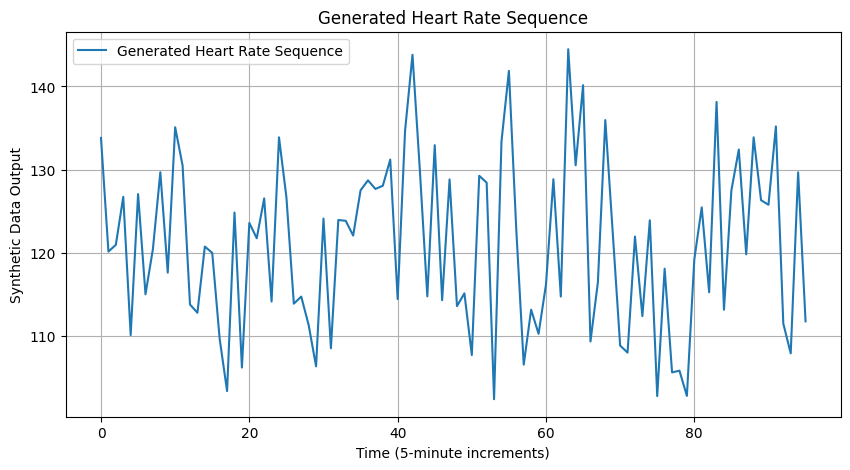

Epoch 501/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 502/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 503/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 504/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 505/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 506/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 507/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 508/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 509/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 510/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 511/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 512/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 513/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 514/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 515/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 516/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 517/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 518/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 519/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 520/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 521/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 522/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 523/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 524/5

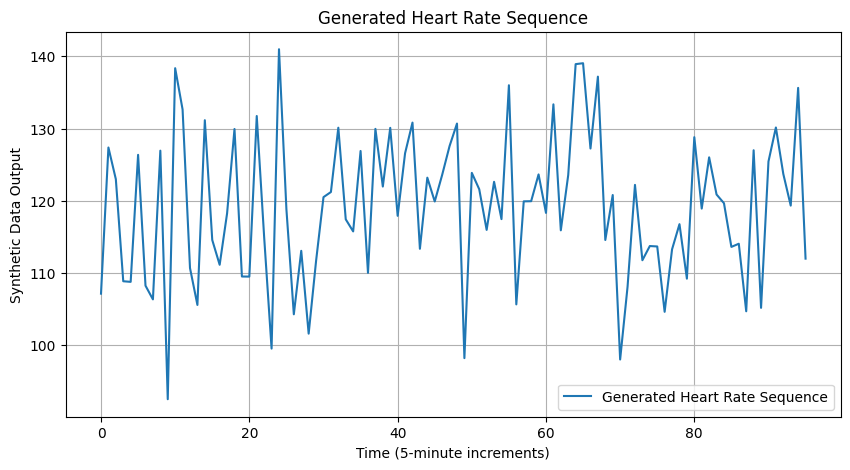

Epoch 1001/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1002/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1003/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1004/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1005/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1006/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1007/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1008/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1009/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1010/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1011/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1012/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1013/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1014/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1015/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1016/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1017/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1018/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1019/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1020/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1021/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1022/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1023/5000 [D loss: 0.0] [G

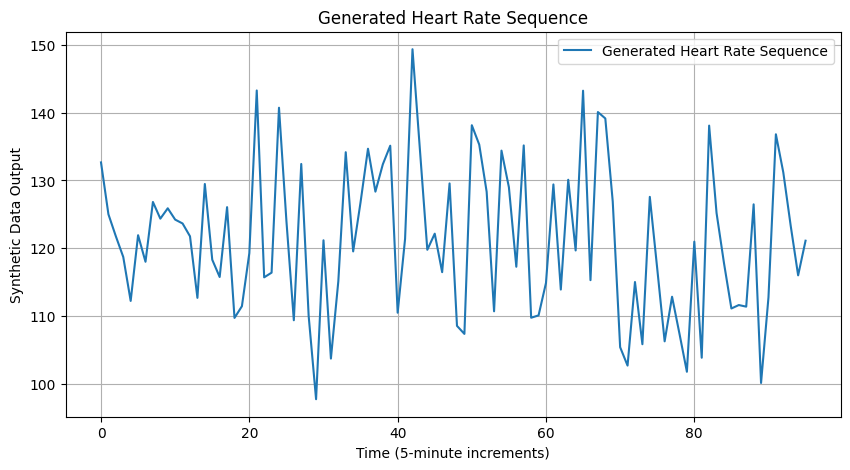

Epoch 1501/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1502/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1503/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1504/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1505/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1506/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1507/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1508/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1509/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1510/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1511/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1512/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1513/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1514/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1515/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1516/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1517/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1518/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1519/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1520/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1521/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1522/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 1523/5000 [D loss: 0.0] [G

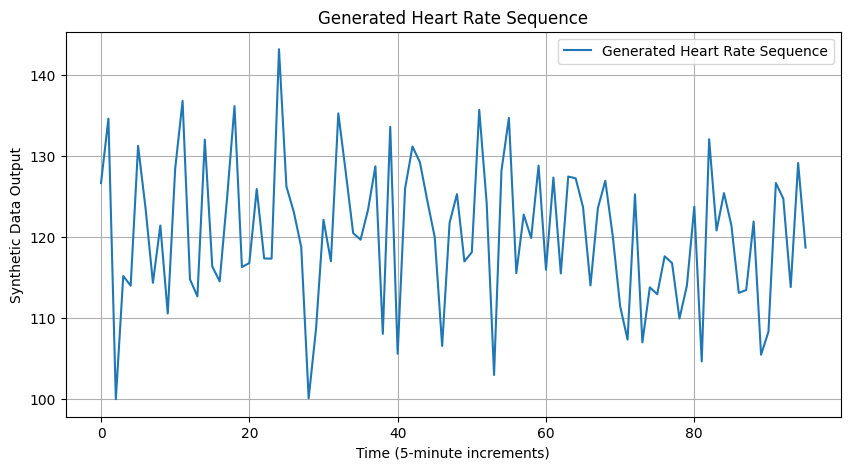

Epoch 2001/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2002/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2003/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2004/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2005/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2006/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2007/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2008/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2009/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2010/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2011/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2012/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2013/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2014/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2015/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2016/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2017/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2018/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2019/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2020/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2021/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2022/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2023/5000 [D loss: 0.0] [G

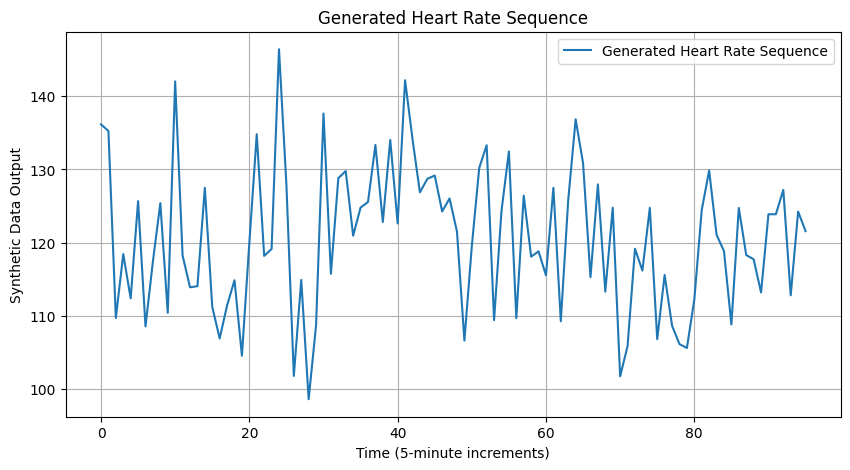

Epoch 2501/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2502/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2503/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2504/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2505/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2506/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2507/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2508/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2509/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2510/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2511/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2512/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2513/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2514/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2515/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2516/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2517/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2518/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2519/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2520/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2521/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2522/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 2523/5000 [D loss: 0.0] [G

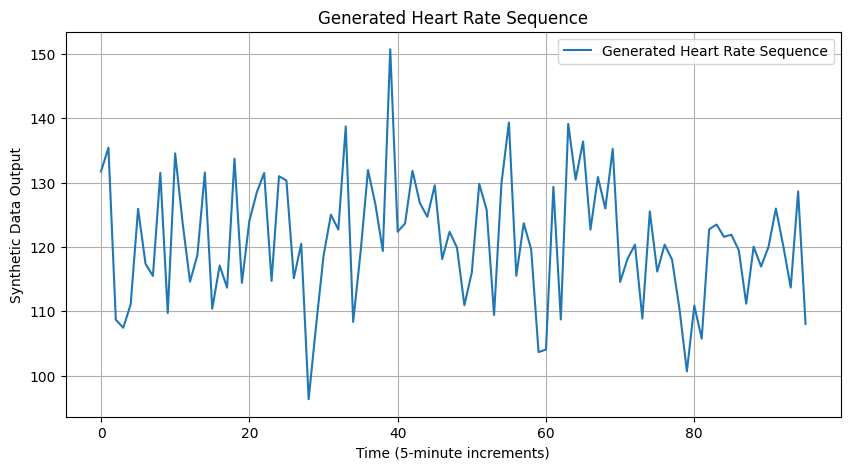

Epoch 3001/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3002/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3003/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3004/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3005/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3006/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3007/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3008/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3009/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3010/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3011/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3012/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3013/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3014/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3015/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3016/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3017/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3018/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3019/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3020/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3021/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3022/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3023/5000 [D loss: 0.0] [G

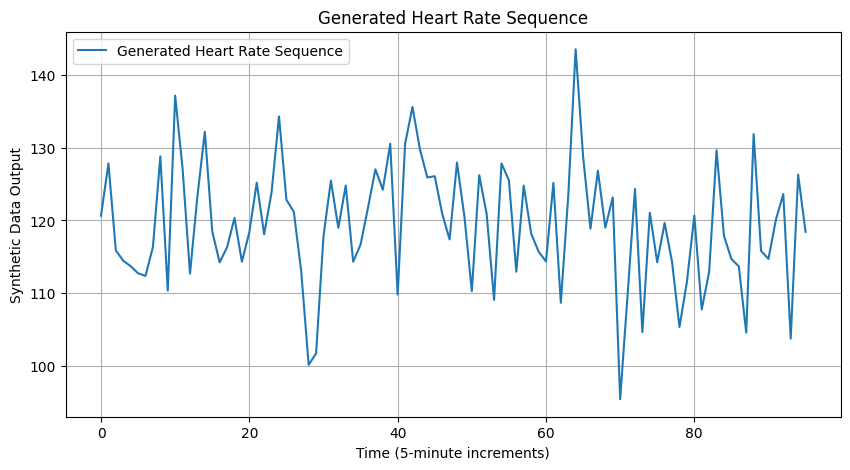

Epoch 3501/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3502/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3503/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3504/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3505/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3506/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3507/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3508/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3509/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3510/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3511/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3512/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3513/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3514/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3515/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3516/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3517/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3518/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3519/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3520/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3521/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3522/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 3523/5000 [D loss: 0.0] [G

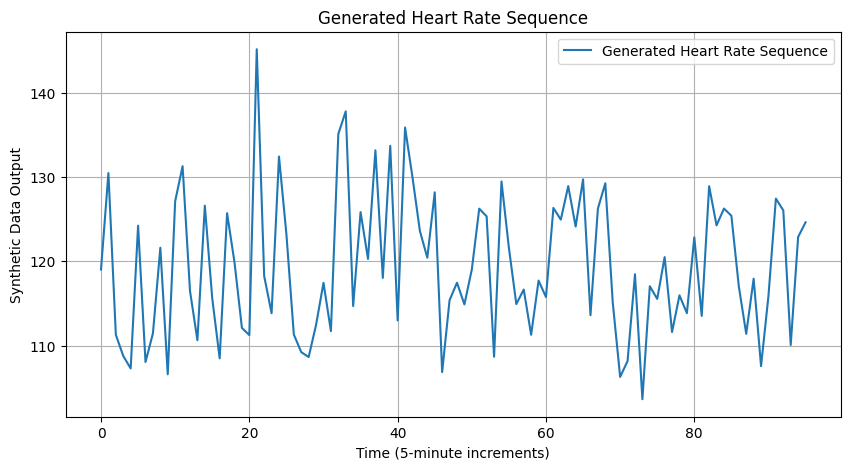

Epoch 4001/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4002/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4003/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4004/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4005/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4006/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4007/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4008/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4009/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4010/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4011/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4012/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4013/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4014/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4015/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4016/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4017/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4018/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4019/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4020/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4021/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4022/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4023/5000 [D loss: 0.0] [G

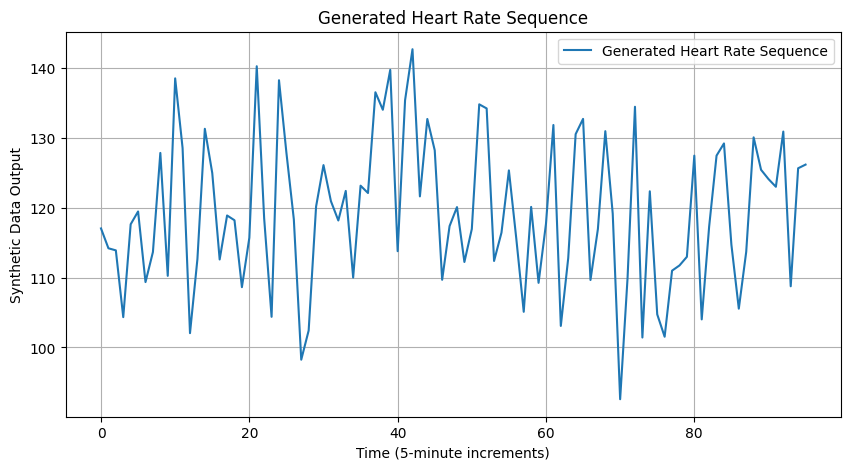

Epoch 4501/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4502/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4503/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4504/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4505/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4506/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4507/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4508/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4509/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4510/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4511/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4512/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4513/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4514/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4515/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4516/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4517/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4518/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4519/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4520/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4521/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4522/5000 [D loss: 0.0] [G loss: 0.0]
Epoch 4523/5000 [D loss: 0.0] [G

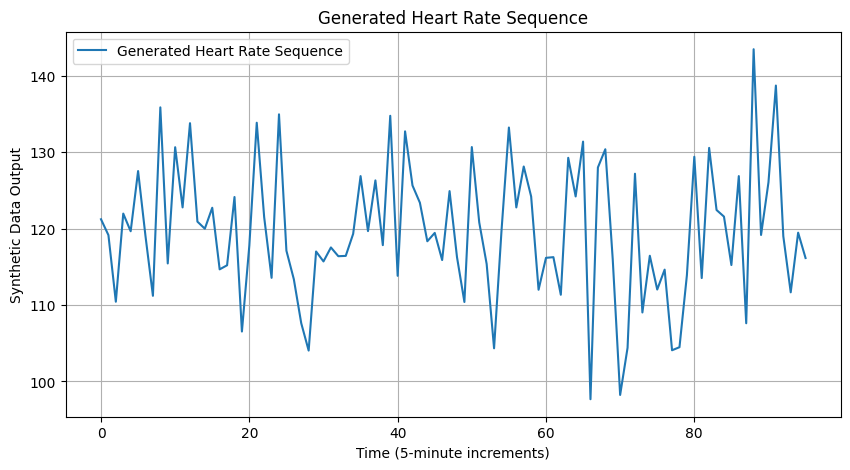

Generated Synthetic Heart Rate Sequences:


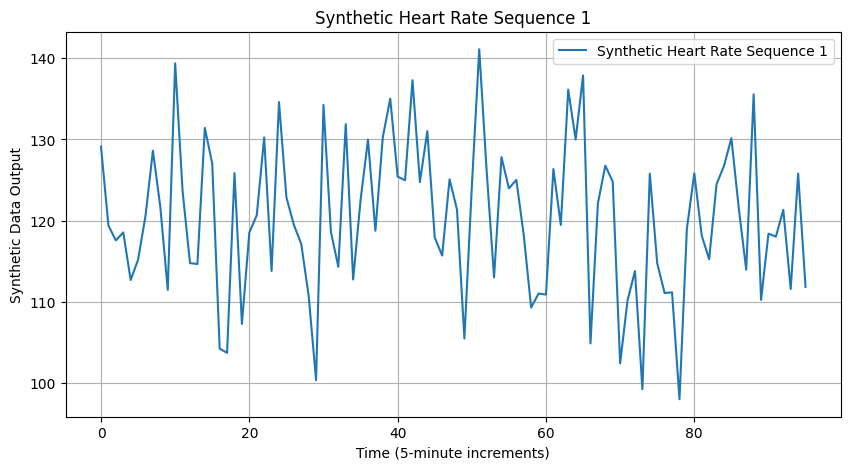

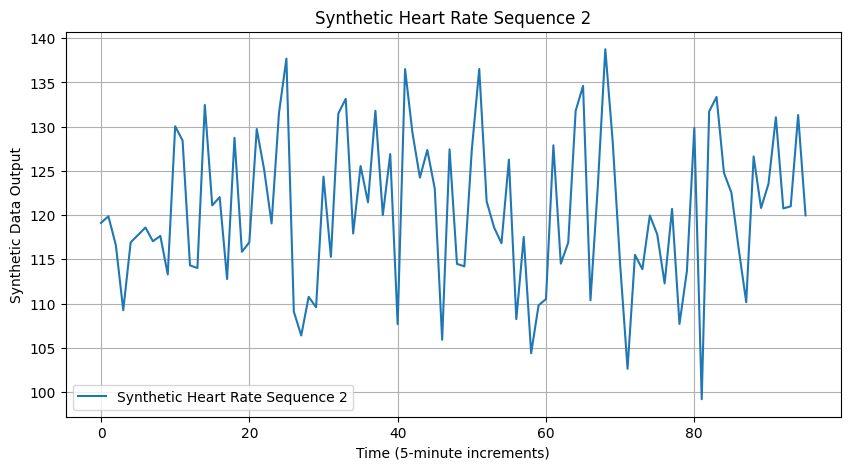

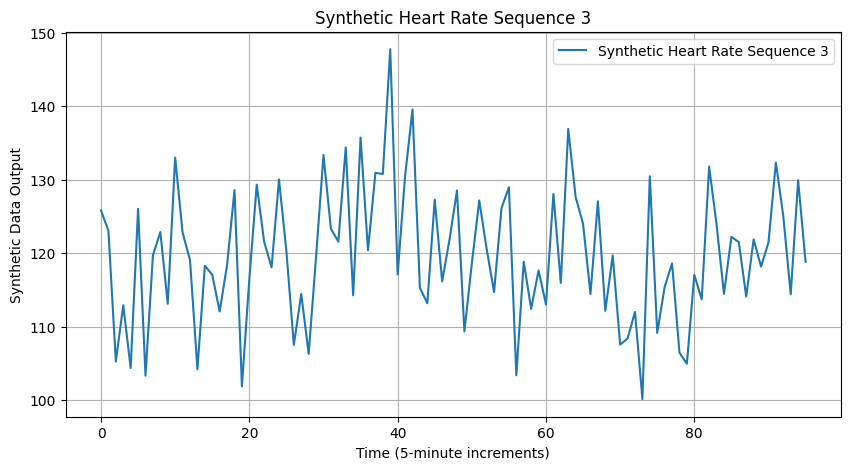

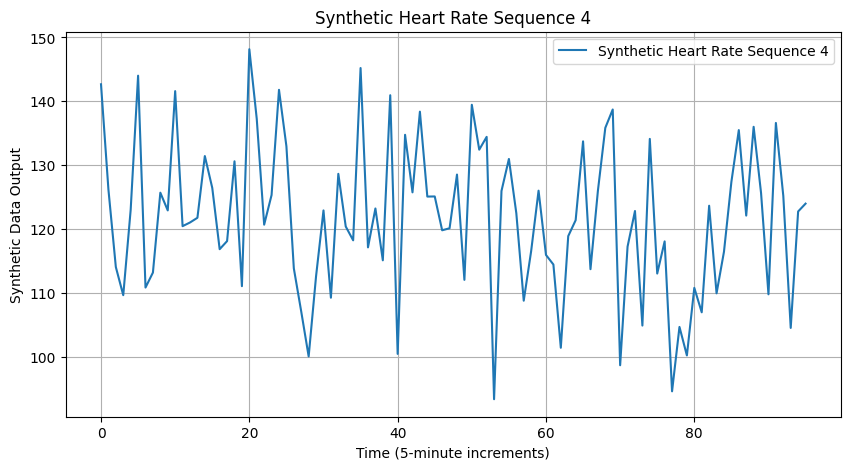

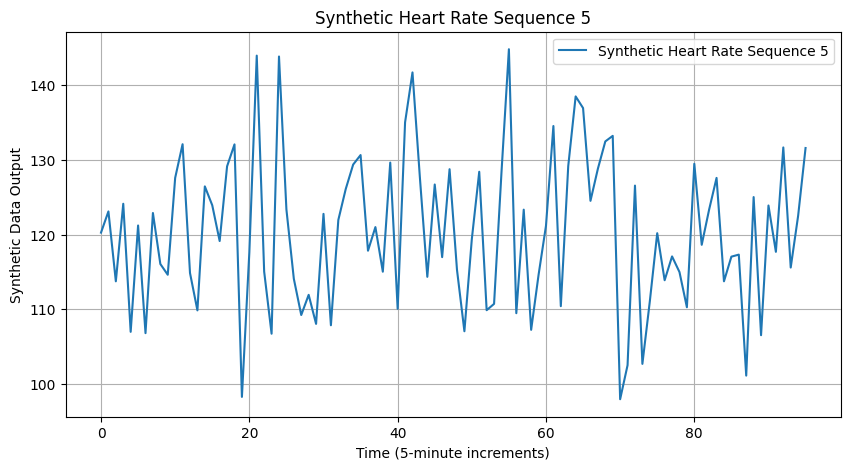

Synthetic data saved to 5h_synthetic_heart_rate_data.csv


In [41]:
# Define the GAN components: Generator and Discriminator
latent_dim = 100  # Size of the latent space (input noise to generator)
sequence_length = 96  # 8 hours in 5-minute increments

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generator Model
class Generator(nn.Module):
    def __init__(self, latent_dim, sequence_length):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, sequence_length),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z) * 100 + 120  # Enhanced scaling to make the output more pronounced (20-220 bpm)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, sequence_length):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(sequence_length, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Create Generator and Discriminator
generator = Generator(latent_dim, sequence_length).to(device)
discriminator = Discriminator(sequence_length).to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function
adversarial_loss = nn.BCELoss()

# Training the GAN
def train_gan(generator, discriminator, optimizer_G, optimizer_D, data, epochs, batch_size):
    real_label = 1.0
    fake_label = 0.0

    d_loss = torch.tensor(0.0, device=device)  # Initialize d_loss as a torch tensor
    g_loss = torch.tensor(0.0)

    for epoch in range(epochs):
        for _ in range(data.shape[0] // batch_size):
            # Train the discriminator
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_sequences = torch.tensor(data[idx], dtype=torch.float32).to(device)
            real_labels = torch.full((batch_size, 1), real_label, dtype=torch.float32, device=device)

            noise = torch.randn(batch_size, latent_dim, device=device)
            fake_sequences = generator(noise)
            fake_labels = torch.full((batch_size, 1), fake_label, dtype=torch.float32, device=device)

            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_sequences), real_labels)
            fake_loss = adversarial_loss(discriminator(fake_sequences.detach()), fake_labels)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

            # Train the generator
            optimizer_G.zero_grad()
            noise = torch.randn(batch_size, latent_dim, device=device)
            generated_sequences = generator(noise)
            g_loss = adversarial_loss(discriminator(generated_sequences), real_labels)
            g_loss.backward()
            optimizer_G.step()

        # Print the progress
        print(f"Epoch {epoch + 1}/{epochs} [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

        # Visualize generated sequence every 500 epochs
        if (epoch + 1) % 500 == 0:
            visualize_generated_sequence(generator)

# Visualization function
def visualize_generated_sequence(generator):
    generator.eval()  # Set the generator to evaluation mode
    noise = torch.randn(1, latent_dim, device=device)
    with torch.no_grad():
        generated_sequence = generator(noise).cpu().numpy()[0]
    
    plt.figure(figsize=(10, 5))
    plt.gca().set_ylim(auto=True)  # Automatically adjust y-axis to emphasize signal variation
    plt.plot(generated_sequence, label='Generated Heart Rate Sequence')
    # plt.ylim([20, 220])  # Comment out fixed y-axis limit to allow automatic adjustment  # Set the y-axis range based on generated sequence values
    plt.xlabel('Time (5-minute increments)')
    plt.ylabel('Synthetic Data Output')
    plt.title('Generated Heart Rate Sequence')
    plt.legend()
    plt.grid(True)
    plt.show()
    generator.train()  # Set the generator back to training mode

# Function to generate synthetic heart rate sequences
def generate_synthetic_data(generator, num_samples=1):
    generator.eval()  # Set the generator to evaluation mode
    noise = torch.randn(num_samples, latent_dim, device=device)
    with torch.no_grad():
        generated_sequences = generator(noise).cpu().numpy()
    generator.train()  # Set the generator back to training mode
    return generated_sequences

# Function to save synthetic data as CSV
def save_synthetic_data_to_csv(synthetic_data, filename='5h_synthetic_heart_rate_data.csv'):
    import pandas as pd
    df = pd.DataFrame(synthetic_data)
    df.to_csv(filename, index=False)
    print(f"Synthetic data saved to {filename}")

# Load the preprocessed heart rate sequences for training
epochs = 5000
batch_size = 32
train_gan(generator, discriminator, optimizer_G, optimizer_D, all_heart_rates, epochs, batch_size)

# Generate synthetic heart rate sequences after training
num_samples = 5
synthetic_data = generate_synthetic_data(generator, num_samples)
print("Generated Synthetic Heart Rate Sequences:")
for i, sequence in enumerate(synthetic_data):
    plt.figure(figsize=(10, 5))
    plt.gca().set_ylim(auto=True)  # Automatically adjust y-axis to emphasize signal variation
    plt.plot(sequence, label=f'Synthetic Heart Rate Sequence {i+1}')
    # plt.ylim([20, 220])  # Comment out fixed y-axis limit to allow automatic adjustment  # Set the y-axis range based on generated sequence values
    plt.xlabel('Time (5-minute increments)')
    plt.ylabel('Synthetic Data Output')
    plt.title(f'Synthetic Heart Rate Sequence {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Save synthetic data to CSV
save_synthetic_data_to_csv(synthetic_data)
